In [2]:
from simplicial import *


G = DiGraph( [[1,2,'2'],[3,3,'3'],[1,1,'1'],[2,3,'3'],[3,1,'1'],[2,2,'2']], multiedges=True, loops=True)
SS = SimplicialSystem(G,'123')
V = SS.vertex(1)

In [3]:
def l_max(M):
    return max(sum(M[:,i].coefficients()) for i in range(M.ncols()))

def linf(M):
    return max(sum(abs(i) for i in M[:,j].coefficients()) for j in range(M.ncols()))

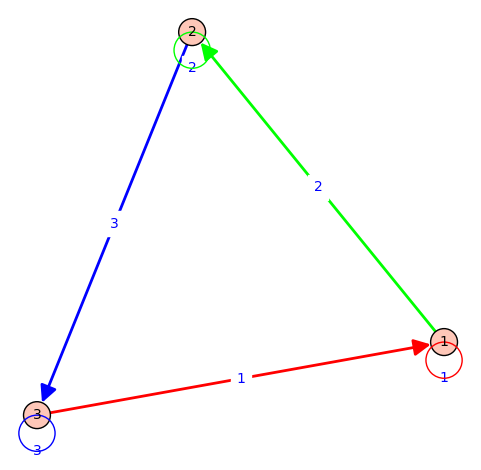

In [4]:
SS.plot()

In [5]:
for _ in range(10):
    rand_S = V.init_rand()
    path = rand_S.labels(10)
    M = V.rauzy_matrix(path)
    N = V.comatrix(path)
    print (path, l_max(M), linf(N))

2312333111 33 13
2312223312 35 8
1222312223 31 23
2231222312 41 14
2222312231 31 14
2231111223 25 18
1233333112 20 15
2312231111 43 15
2223311223 27 10
1222331111 25 7


In [32]:
for i in range(10, 100, 10):
    path = '2'*i + '3'*i + '1'*i
    M = V.rauzy_matrix(path)
    N = V.comatrix(path)
    print (l_max(M), linf(N), float(linf(N)/l_max(M)))

121 888 7.338842975206612
441 7578 17.183673469387756
961 26068 27.125910509885536
1681 62358 37.095776323616896
2601 122448 47.07727797001154
3721 212338 57.06476753560871
5041 338028 67.05574290815315
6561 505518 77.04892546867856
8281 720808 87.04359376886849


In [6]:
for i in range(10, 100, 10):
    path = '231'*i
    M = V.rauzy_matrix(path)
    N = V.comatrix(path)
    print (l_max(M), linf(N), float(linf(N)/l_max(M)))

125491 536 0.004271222637479978
11990037126 170444 1.4215468910467159e-05
1145588046254325 43785293 3.822080122358355e-08
109455205011414534460 13541584517 1.2371804991446333e-10
10457897097706866905761876 4892590175575 4.678369016126399e-13
999199733761590509464763705985 1595121658612549 1.596399202997732e-15
95468534316345053013027895963549629 378316643232331093 3.962736475860612e-18
9121540705580106640821101184010190434771 131959346769758132956 1.4466782644409177e-20
871517567954427355760894350927437348652751806 41287072103963579349266 4.737376918387321e-23


In [7]:
for i in range(10, 100, 10):
    path = '2'*i
    M = V.rauzy_matrix(path)
    N = V.comatrix(path)
    print (l_max(M), linf(N), float(linf(N)/l_max(M)))

11 10 0.9090909090909091
21 20 0.9523809523809523
31 30 0.967741935483871
41 40 0.975609756097561
51 50 0.9803921568627451
61 60 0.9836065573770492
71 70 0.9859154929577465
81 80 0.9876543209876543
91 90 0.989010989010989


## Conjugation

The win-lose induction on this simplicial system is conjugated to a slow version of Garrity's triangle map.

In [9]:
P1 = matrix([[1,1,1],[0,1,1],[0,0,1]])
P2 = matrix([[1,0,0],[1,1,1],[1,0,1]])
P3 = matrix([[1,1,0],[0,1,0],[1,1,1]])
proj = [P2,P3,P1]
show(proj)

[
[1 0 0]  [1 1 0]  [1 1 1]
[1 1 1]  [0 1 0]  [0 1 1]
[1 0 1], [1 1 1], [0 0 1]
]

We pick a random positive vector $a$ that induced a vector $x = (a_1 + a_2 + a_3, a_2 + a_3, a_3)$ such that $x_1 > x_2 > x_3$.

In [3]:
a = vector((0.854599620723054,0.374258722475203,0.0742542188863135))
show(a)

(0.854599620723054, 0.374258722475203, 0.0742542188863135)

Then we perform two steps of triangle map.
Notice that $b_1 = 11$ at the first step and $b_2 = 9$.

In [4]:
x = P1*vector(a)
show(P1*a)

x[0] -= x[1] 
x[0] -= 11*x[2]
show(x)

x[1] -= x[2] 
x[1] -= 9*x[0]
show(x)

(1.30311256208457, 0.448512941361516, 0.0742542188863135)

(0.0378032129736054, 0.448512941361516, 0.0742542188863135)

(0.0378032129736054, 0.0340298057127539, 0.0742542188863135)

Starting at vertex 3, which corresponds to the order $x_1 > x_2 > x_3$, we iterate the induction until we change vertex.
Notice that it loops $b_1 = 11$ times before it changes.
Thus it takes $11 + 1$ steps.

In [12]:
SS.pos = 3
ap, p = SS.path(12,{str(i+1):a[i] for i in range(3)}, inplace=False)
ap = vector([ap[str(i+1)] for i in range(3)])
pos = SS.end_pos(p)
print(p)
print(pos)
show(proj[pos-1]*ap)

333333333331
1


(0.0378032129736052, 0.448512941361516, 0.0742542188863135)

Notice that this coincide with the first image of $x$ through triangle map.

We iterate the induction until we change vertex twice.
Notice that it loops $b_2 = 9$ times before it changes on the second vertex.
Thus it takes $9 + 1$ steps.

In [13]:
SS.pos = 3
ap, p = SS.path(11+1+9+1, {str(i+1):a[i] for i in range(3)}, inplace=False)
ap = vector([ap[str(i+1)] for i in range(3)])
pos = SS.end_pos(p)
print(p)
print(pos)
show(proj[pos-1]*ap)

3333333333311111111112
2


(0.0378032129736052, 0.0340298057127564, 0.0742542188863135)

Again this coincides with the image of $x$ after applying twice the triangle map.

## Positive matrix

In [43]:
for n in range(1,6):
    for p in SS.path_iterator(n):
        M = SS.rauzy_matrix(p)
        if all(M[i,j]>0 for i in range(3) for j in range(3)) and SS.end_pos(p) == SS.pos:
            print(p)
            print(SS.rauzy_matrix(p))

1123
[1 1 1]
[1 2 2]
[1 1 2]
11123
[1 1 1]
[2 3 3]
[1 1 2]
11223
[1 1 1]
[1 2 2]
[1 2 3]
11233
[1 1 2]
[1 2 3]
[1 1 3]
31123
[2 2 3]
[1 2 2]
[1 1 2]


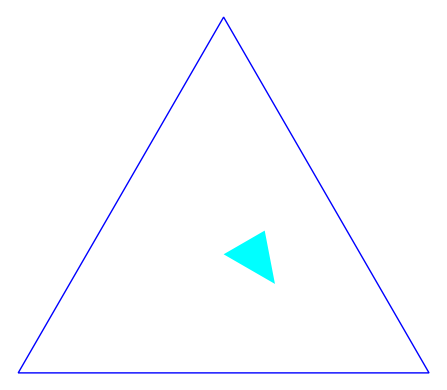

In [17]:
gamma = "1123"
plot_simplex() + SS._sub_simplex(gamma)

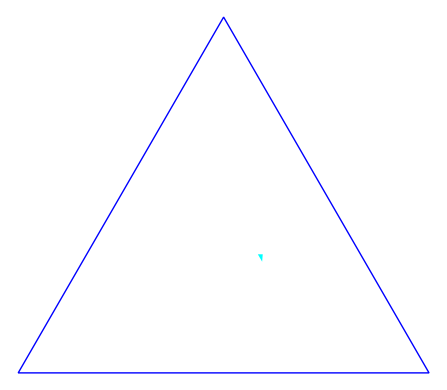

In [44]:
gamma = "1123"
plot_simplex() + SS._sub_simplex(gamma + gamma)

In [41]:
plt = SS._sub_simplex(gamma, col='grey')
for n in range(2, 14):
    for p in SS.path_iterator(n):
        if p.find(gamma) == -1 and SS.end_pos(p) == 3:
            plt += SS._sub_simplex(gamma+p+gamma)

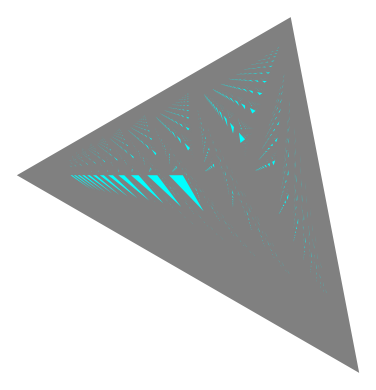

In [42]:
plt

# Lyapunov exponents

In [1]:
from simplicial import *

G = DiGraph( [[1,1,'2'],[1,1,'1']], multiedges=True, loops=True)
q = {l:1. for l in set(G.edge_labels())}
SS = SimplicialSystem(G,q,1)
G.plot(edge_labels=True)

L = top_lyapunov_exp(SS,int(1e4))
print(L)

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: sage.structure.element.Vector size changed, may indicate binary incompatibility. Expected 40 from C header, got 48 from PyObject
  return f(*args, **kwds)


(1107.4471271512575, -1.5021298813576323)


In [ ]:
G = DiGraph( [[1,1,'1'],[1,1,'2']], multiedges=True, loops=True)
q = {l:1. for l in set(G.edge_labels())}
SS = SimplicialSystem(G,q,1)

L = top_lyapunov_exp(SS,int(1e4))
print(L)

In [6]:
L = top_lyapunov_exp(SS,int(1e5))
print(L)

(0.09013832800683592, 0.09012476779636446, 0.09005221887624439)


In [7]:
L = top_lyapunov_exp(SS,int(1e6))
print(L)

(0.044242759353197346, 0.044242822947344995, 0.04424742872246494)


* Triangle map

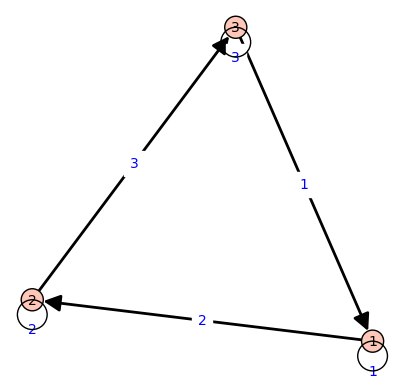

In [2]:
from simplicial import *

G = DiGraph( [[1,2,'2'],[3,3,'3'],[1,1,'1'],[2,3,'3'],[3,1,'1'],[2,2,'2']], multiedges=True, loops=True)
q = {l:1. for l in set(G.edge_labels())}
SS = SimplicialSystem(G,q,3)
G.plot(edge_labels=True)

In [3]:
SS.pos = 3
show(SS.dual_matrix('1'),SS.rauzy_matrix('1'))

[ 1  0 -1]
[ 0  1  0]
[ 0  0  1] [1 0 0]
[0 1 0]
[1 0 1]

In [4]:
SS.pos = 3
show(SS.dual_matrix('1111'),SS.rauzy_matrix('1111'))
show(SS.dual_matrix('1111222222'),SS.rauzy_matrix('1111222222'))

[ 1 -3 -1]
[ 0  1  0]
[ 0  0  1] [1 0 0]
[3 1 0]
[1 0 1]

[ 4 -3 14]
[-1  1 -5]
[ 0  0  1] [1 1 0]
[3 4 0]
[1 6 1]

In [6]:
SS.dual_matrix('11112222223331111')

[-24  55  38]
[  9 -21 -14]
[ -2   5   3]

In [7]:
SS.rauzy_matrix('11112222223331111')

[ 7  1  3]
[25  4 10]
[28  6  9]

In [12]:
SS.pos = 3
show(SS.dual_matrix('1111'),SS.rauzy_matrix('1111'))
show(SS.dual_matrix('1111222222'),SS.rauzy_matrix('1111222222'))

[ 1 -3 -1]
[ 0  1  0]
[ 0  0  1] [1 0 0]
[3 1 0]
[1 0 1]

[ 4 -3 14]
[-1  1 -5]
[ 0  0  1] [1 1 0]
[3 4 0]
[1 6 1]

In [8]:
def test(l):
    letter=2
    word=''
    for i in range(len(l)):
        letter = (letter+1)%3
        word += str(letter+1)*(l[i]+1)
    return SS.dual_matrix(word),SS.rauzy_matrix(word)

show(test([4,3,0,0]))

(
[  5 -15   6]  [2 1 1]
[ -1   4  -2]  [9 5 5]
[  0  -1   1], [6 4 5]
)

In [10]:
show(test([2,2,2]))

(
[-3 -5  3]  [1 1 3]
[ 3  3 -2]  [2 3 7]
[-2 -1  1], [1 3 6]
)

In [11]:
from itertools import *
for l in product(range(3,10),repeat=3):
    M1,M2 = test(l)
    m1,m2 = max(map(abs,M1.list())),max(M2.list())
    if m1<m2:
        show(l,(m1,m2))

In [41]:
from itertools import *

for s in product(range(1,5),repeat=3) :
    for l in product(range(3,5),repeat=3) :
        M1,M2 = test(s+l)
        m1,m2 = max(map(abs,M1.list())),max(M2.list())
        if m1<m2:
            print(s+l,(m1,m2))

(1, 1, 1, 3, 3, 3) (48, 62)
(1, 1, 1, 3, 3, 4) (67, 73)
(1, 1, 1, 4, 3, 3) (64, 70)
(1, 1, 2, 3, 3, 3) (48, 70)
(1, 1, 2, 3, 3, 4) (67, 82)
(1, 1, 2, 3, 4, 3) (69, 75)
(1, 1, 2, 4, 3, 3) (64, 78)
(1, 1, 2, 4, 3, 4) (89, 92)
(1, 1, 3, 3, 3, 3) (49, 78)
(1, 1, 3, 3, 3, 4) (69, 91)
(1, 1, 3, 3, 4, 3) (73, 84)
(1, 1, 3, 4, 3, 3) (73, 86)
(1, 1, 4, 3, 3, 3) (69, 86)
(1, 1, 4, 3, 3, 4) (97, 100)
(1, 2, 1, 3, 3, 3) (39, 83)
(1, 2, 1, 3, 3, 4) (54, 98)
(1, 2, 1, 3, 4, 3) (54, 88)
(1, 2, 1, 3, 4, 4) (74, 103)
(1, 2, 1, 4, 3, 3) (47, 95)
(1, 2, 1, 4, 3, 4) (65, 113)
(1, 2, 1, 4, 4, 3) (65, 100)
(1, 2, 1, 4, 4, 4) (89, 118)
(1, 2, 2, 3, 3, 3) (30, 91)
(1, 2, 2, 3, 3, 4) (43, 107)
(1, 2, 2, 3, 4, 3) (48, 97)
(1, 2, 2, 3, 4, 4) (67, 113)
(1, 2, 2, 4, 3, 3) (54, 103)
(1, 2, 2, 4, 3, 4) (76, 122)
(1, 2, 2, 4, 4, 3) (81, 109)
(1, 2, 2, 4, 4, 4) (112, 128)
(1, 2, 3, 3, 3, 3) (70, 99)
(1, 2, 3, 3, 3, 4) (99, 116)
(1, 2, 3, 4, 3, 3) (110, 111)
(1, 3, 1, 3, 3, 3) (30, 104)
(1, 3, 1, 3, 3, 4) (41, 123)
(1,

In [38]:
from itertools import *

for s in product(range(1,5),repeat=3) :
    for l in product(range(3,5),repeat=3) :
        M1,M2 = test(l+s)
        m1,m2 = max(map(abs,M1.list())),max(M2.list())
        if m1<m2:
            print(l+s,(m1,m2))

(3, 3, 3, 1, 1, 1) (48, 70)
(3, 3, 4, 1, 1, 1) (64, 82)
(3, 4, 3, 1, 1, 1) (69, 70)
(4, 3, 3, 1, 1, 1) (67, 91)
(4, 3, 4, 1, 1, 1) (89, 107)
(3, 3, 3, 1, 1, 2) (67, 90)
(3, 3, 4, 1, 1, 2) (83, 105)
(4, 3, 3, 1, 1, 2) (93, 117)
(4, 3, 4, 1, 1, 2) (115, 137)
(3, 3, 3, 1, 1, 3) (86, 110)
(3, 3, 4, 1, 1, 3) (102, 128)
(4, 3, 3, 1, 1, 3) (119, 143)
(4, 3, 4, 1, 1, 3) (141, 167)
(3, 3, 3, 1, 1, 4) (105, 130)
(3, 3, 4, 1, 1, 4) (121, 151)
(4, 3, 3, 1, 1, 4) (145, 169)
(4, 3, 4, 1, 1, 4) (167, 197)
(3, 3, 3, 1, 2, 1) (39, 83)
(3, 3, 4, 1, 2, 1) (47, 98)
(3, 4, 3, 1, 2, 1) (54, 83)
(3, 4, 4, 1, 2, 1) (65, 98)
(4, 3, 3, 1, 2, 1) (54, 108)
(4, 3, 4, 1, 2, 1) (65, 128)
(4, 4, 3, 1, 2, 1) (74, 108)
(4, 4, 4, 1, 2, 1) (89, 128)
(3, 3, 3, 1, 2, 2) (49, 103)
(3, 3, 4, 1, 2, 2) (49, 121)
(3, 4, 3, 1, 2, 2) (64, 103)
(3, 4, 4, 1, 2, 2) (64, 121)
(4, 3, 3, 1, 2, 2) (67, 134)
(4, 3, 4, 1, 2, 2) (67, 158)
(4, 4, 3, 1, 2, 2) (87, 134)
(4, 4, 4, 1, 2, 2) (87, 158)
(3, 3, 3, 1, 2, 3) (59, 123)
(3, 3, 4, 1, 2,

In [40]:
from itertools import *

for s in product(range(3,7),repeat=3) :
    for l in product(range(3,7),repeat=3) :
        M1,M2 = test(s+l)
        m1,m2 = max(map(abs,M1.list())),max(M2.list())
        if m1<m2:
            print(s+l,(m1,m2))

In [11]:
SS.plot_cotangent(int(1e4), 1000, 'triangle')

[Graphics object consisting of 2579 graphics primitives,
 Graphics object consisting of 3453 graphics primitives,
 Graphics object consisting of 2970 graphics primitives]

In [5]:
L = top_lyapunov_exp(SS,int(1e6))
print(L)
print(L[1]/L[0])
print(1-L[1]/L[0])

(0.018486275121077214, 0.005698853475857545)
0.30827483841566167
0.6917251615843383


Wolfgang's value 0.6859
***

In [13]:
l = 10
for _ in range(100):
        gamma = SS.path(l)
        M = SS.dual_matrix(gamma)
        SSc = copy(SS)
        SSc.follow(gamma)
        a = any([all([sign(M[i,j]) == sign(M[i,0]) for j in range(3)]) for i in range(3)])
        b = any([all([sign(M[j,i]) == sign(M[0,i]) for j in range(3)]) for i in range(3)])
        if a and b:
            print(gamma)    
            print(M)

In [19]:
l = 1000
for _ in range(1000):
        gamma = SS.path(l)
        x = (int(gamma[-1]) + 1) %3
        if x == 0: x=3
        gamma += str(x)
        M = SS.dual_matrix(gamma)
        N = SS.rauzy_matrix(gamma)
        SSc = copy(SS)
        SSc.follow(gamma)
        a = max(max(map(abs,N[i,:].list())) for i in range(3))
        b = max(max(map(abs,M[i,:].list())) for i in range(3))
        if int(a)>int(b):
            print(gamma)
            print(list(map(int,SSc.q.values())))
            print(M)
            print(a,b)

1222222222312333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333

KeyboardInterrupt: 

In [22]:
l = 1000
for _ in range(1000):
        gamma = SS.path(l)
        M = SS.dual_matrix(gamma)
        SSc = copy(SS)
        SSc.follow(gamma)
        a = max(map(int,SSc.q.values()))-3
        b = max(max(map(abs,M[i,:].list())) for i in range(3))-1
        if int(a)>int(b):
            print(gamma)
            print(list(map(int,SSc.q.values())))
            print(M)
            print(a,b)
            for n in range(1,l):
                SSc = copy(SS)
                SSc.follow(gamma[:n])
                M = SS.dual_matrix(gamma[:n])
                a = max(map(int,SSc.q.values()))-3
                b = max(max(map(abs,M[i,:].list())) for i in range(3))-1

                if int(a)>int(b):
                    print('*',end='')
                print(gamma[n-1],end='')

1223331112222223311111112222312223122223333331112223333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333

311*1*1*2*2*2*2*2*222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222333333333111231222222*2*2*3*3*3*3*3*1*1*1*1*1*1*1*1*1*1*2*3*1*1*2*2*2*3*3*1*2*2*2*3*1*2*3*3*3*3*3*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*3*3*1*2*2*3*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1

312*2*2*2*2*2*2*2*2*2*3*3*3*1*2*2*3*3*1*1*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*

312*2*2*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*

333333333333333333333333333112*2*3*3*3*3*3*3*3*3*3*3*3*1*1*1*1*1*1*1*1*1*1*2*3*1*2*2*2*2*2*2*2*2*2*2*3*3*3*1*2*3*3*3*3*1*1*1*1*2*2*3*3*1*1*1*1*1*1*1*2*2*3*3*3*1*1*1*1*1*2*2*2*2*2*3*3*1*1*2*3*3*1*2*2*3*1*1*1*2*2*2*2*2*2*2*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*2*2*3*1*1*2*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*2*2*2*2*3*3*3*3*1*2*2*2*2*2*2*2*2*2*2*3*3*3*3*3*3*3*3*3*3*3*1*2*3*3*1*2*3*1*1*1*1*2*3*3*3*3*3*1*1*2*3*1*1*1*1*1*1*1*1*1*2*2*3*3*3*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*1*2*2*2*2*2*2*2*2*2*3*1*2*2*2*2*2*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3

12*3*3*1*1*2*2*2*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3

1112*2*2*22223*1*1*1*1*1*1*2*2*2*2*222222222231*1*1*1*2*2*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*3*

In [27]:
SS = SimplicialSystem(G,q,3)
SSc = copy(SS)
gamma = ''
prev = matrix(3,3,0)
for _ in range(100):
    init = SSc.pos
    lab = SSc._step(label=True)
    gamma += lab
    print (str(init) + ' -' + str(lab) + '-> ' + str(SSc.pos))
    show([int(SSc.q[str(i+1)]) for i in range(3)])
    M = SS.dual_matrix(gamma)
    show(M.apply_map(sign))
    M = M.apply_map(abs)
    if (max(M.list()) < max(prev.list())):
        show (SS.dual_matrix(gamma), SS.dual_matrix(gamma[:-1]))
    prev = M

3 -1-> 1


[2, 1, 1]

[ 1  0 -1]
[ 0  1  0]
[ 0  0  1]

1 -1-> 1


[3, 1, 1]

[ 1 -1 -1]
[ 0  1  0]
[ 0  0  1]

1 -1-> 1


[4, 1, 1]

[ 1 -1 -1]
[ 0  1  0]
[ 0  0  1]

1 -2-> 2


[4, 5, 1]

[ 1 -1 -1]
[-1  1  0]
[ 0  0  1]

2 -2-> 2


[4, 6, 1]

[ 1 -1  1]
[-1  1 -1]
[ 0  0  1]

2 -2-> 2


[4, 7, 1]

[ 1 -1  1]
[-1  1 -1]
[ 0  0  1]

2 -2-> 2


[4, 8, 1]

[ 1 -1  1]
[-1  1 -1]
[ 0  0  1]

2 -2-> 2


[4, 9, 1]

[ 1 -1  1]
[-1  1 -1]
[ 0  0  1]

2 -2-> 2


[4, 10, 1]

[ 1 -1  1]
[-1  1 -1]
[ 0  0  1]

2 -2-> 2


[4, 11, 1]

[ 1 -1  1]
[-1  1 -1]
[ 0  0  1]

2 -2-> 2


[4, 12, 1]

[ 1 -1  1]
[-1  1 -1]
[ 0  0  1]

2 -3-> 3


[4, 12, 13]

[ 1 -1  1]
[-1  1 -1]
[ 0 -1  1]

3 -3-> 3


[4, 12, 17]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 21]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 25]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 29]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 33]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 37]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 41]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 45]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 49]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 53]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 57]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 61]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 65]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 69]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 73]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -3-> 3


[4, 12, 77]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

3 -1-> 1


[81, 12, 77]

[-1 -1  1]
[ 1  1 -1]
[-1 -1  1]

1 -1-> 1


[93, 12, 77]

[-1  1  1]
[ 1 -1 -1]
[-1  1  1]

1 -1-> 1


[105, 12, 77]

[-1  1  1]
[ 1 -1 -1]
[-1  1  1]

1 -2-> 2


[105, 117, 77]

[-1  1  1]
[ 1 -1 -1]
[-1  1  1]

2 -2-> 2


[105, 194, 77]

[-1  1 -1]
[ 1 -1  1]
[-1  1 -1]

2 -3-> 3


[105, 194, 271]

[-1  1 -1]
[ 1 -1  1]
[-1  1 -1]

3 -3-> 3


[105, 194, 376]

[-1  1 -1]
[ 1 -1  1]
[-1  1 -1]

[-423  572 -177]
[ 229 -310   96]
[ -33   45  -14] [-600  572 -177]
[ 325 -310   96]
[ -47   45  -14]

3 -3-> 3


[105, 194, 481]

[-1  1 -1]
[ 1 -1  1]
[-1  1 -1]

3 -3-> 3


[105, 194, 586]

[-1  1 -1]
[ 1 -1  1]
[-1  1 -1]

3 -3-> 3


[105, 194, 691]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 796]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 901]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1006]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1111]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1216]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1321]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1426]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1531]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1636]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1741]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1846]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 1951]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2056]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2161]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2266]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2371]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2476]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2581]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2686]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2791]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 2896]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3001]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3106]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3211]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3316]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3421]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3526]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3631]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3736]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3841]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 3946]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 4051]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 4156]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 4261]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -3-> 3


[105, 194, 4366]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

3 -1-> 1


[4471, 194, 4366]

[ 1  1 -1]
[-1 -1  1]
[ 1  1 -1]

1 -1-> 1


[4665, 194, 4366]

[ 1 -1 -1]
[-1  1  1]
[ 1 -1 -1]

1 -2-> 2


[4665, 4859, 4366]

[ 1 -1 -1]
[-1  1  1]
[ 1 -1 -1]

2 -2-> 2


[4665, 9225, 4366]

[ 1 -1 -1]
[-1  1  1]
[ 1 -1 -1]

2 -2-> 2


[4665, 13591, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 17957, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 22323, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 26689, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 31055, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 35421, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 39787, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 44153, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 48519, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 52885, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 57251, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 61617, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 65983, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 70349, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 74715, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 79081, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 83447, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 87813, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 92179, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 96545, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 100911, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 105277, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

2 -2-> 2


[4665, 109643, 4366]

[ 1 -1  1]
[-1  1 -1]
[ 1 -1  1]

In [22]:
M > identity_matrix(3)

True

In [12]:
l = 1000
for _ in range(100):
        gamma = SS.path(l)
        M = SS.dual_matrix(gamma)
        SSc = copy(SS)
        SSc.follow(gamma)
        a = max(map(int,SSc.q.values()))-3
        b = max(max(map(abs,M[i,:].list())) for i in range(3))-1
        if int(a)>int(b):
            print(gamma)
            print(list(map(int,SSc.q.values())))
            print(M)
            print(a,b)

1111111111111111111111111111111111122222233111223333331112222331233311111111111111111233111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [15]:
l = 10
for _ in range(10):
        gamma = SS.path(l)
        M = SS.dual_matrix(gamma)
        SSc = copy(SS)
        SSc.follow(gamma)
        if not all(len(set(map(sign,M[i,:].list()))) >= 2 for i in range(3)):
            print(False)
        print(M)
        

[ 1 -4 -2]
[-1  7  0]
[ 0 -1  1]
[  5  -4   7]
[ -1   1  -2]
[-10   8 -13]
[ 1 -9 -1]
[ 0  1  0]
[ 0  0  1]
[ 1  0 -2]
[-3  2 -1]
[-2 -1  8]
[ 1 -9 -1]
[ 0  1  0]
[ 0  0  1]
[ 2 -1  6]
[-1  1 -7]
[ 0  0  1]
[ 1 -9 -1]
[ 0  1  0]
[ 0  0  1]
[ 5 -9 -6]
[-1  3  1]
[-4  7  5]
[  1   0   0]
[  0   1   0]
[-10   0   1]
[ 7 -6  5]
[-1  1 -1]
[-7  6 -4]


In [120]:
i = 0
S = len(set(map(sign,M[i,:].list()))) == 2
len(S)

2

In [17]:
M.apply_map(sign)

[ 1 -1  1]
[-1  1 -1]
[-1  1 -1]

In [87]:
l = 100
for _ in range(10):
        gamma = SS.path(l)
        M = SS.dual_matrix(gamma)
        SSc = copy(SS)
        SSc.follow(gamma)
        a = max(map(int,SSc.q.values()))-1
        b = max(sum(map(abs,M[i,:].list())) for i in range(3))-1
        if int(a)>int(b):
            print(gamma)
            print(list(map(int,SSc.q.values())))
            print(M)
            
            print(a,b)

3112223333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333
[383, 9, 4]
[-91  -2   1]
[185   3  -2]
[ -2   1   0]
382 189
1223333111111111112231122311233333333333333331122333333333333111111222233333331111222222222222222222
[4270768, 82398919, 8529019]
[ -104652    76899 -1274669]
[  -68629    50408  -835500]
[   85128   -62545  1036718]
82398918 1456219
3112233331111111111111111111111111111111111111111111111111111111111111111111111111111223333333333333
[7199, 578, 550]
[-1635  -300   149]
[-1590  -293   145]
[ 4048   744  -369]
7198 5160


In [105]:
gamma = '1111112311111'
M = SS.dual_matrix(gamma)
SSc = copy(SS)
SSc.follow(gamma)
a = max(map(int,SSc.q.values()))-1
b = max(sum(map(abs,M[i,:].list())) for i in range(3))-1
print(gamma)
print(list(map(int,SSc.q.values())))
print(M)
print(a,b)

1111112311111
[9, 8, 48]
[  6 -28  -7]
[ -1   5   1]
[  0  -1   1]
47 40


* Rauzy induction in genus 0 and 1

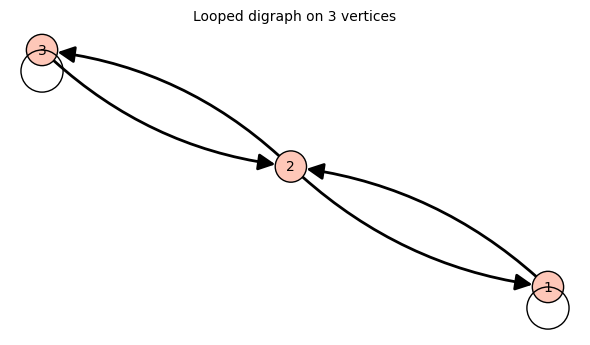

In [10]:
RD = Rauzy()
G = RD.G
G

In [11]:
top_lyapunov_exp(RD,int(1e4))

(0.09237224220120044, 0.09162523473538857, 0.09247568725057204)

In [14]:
RDg2 = RauzyDiagramToSS([1]*2)
L = top_lyapunov_exp(RDg2,int(1e5))
L

(0.018435711911737835, 0.018414854034832333, 0.018454620675774233)

* Cassaigne algorithm

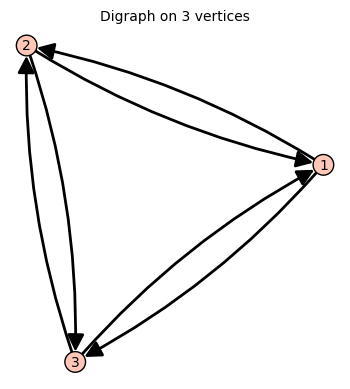

In [54]:
SC = Cassaigne()
SC.G

In [22]:
L = top_lyapunov_exp(SC,int(1e5))
print(L)
print(2-L[1]/L[0])

(0.1829942735480953, 0.11263587807145341, 0.18300852923486116)
1.3844841377407913


Wolfgang's value 1.3871
***

In [71]:
for l in range(100,101):
    for _ in range(10):
        gamma = SC.path(l)
        M = SC.dual_matrix(gamma)
        SCc = copy(SC)
        SCc.follow(gamma)
        a = max(map(int,SCc.q.values()))
        b = max(max(map(abs,M[i,:].list())) for i in range(3))
        if int(a)>int(b):
            print(gamma)
            print(list(map(int,SCc.q.values())))
            print(M)
            print(a,b)

3131313131313131313131313131213212123212323231313131312323232323232323212312132323232323232323232313
[2202156, 2015343, 4105906]
[-3322   413  1579]
[  290  -105  -104]
[-4307  1691  1480]
4105906 4307
3123131313121323123232323232323232323131212323132323232321312121212123131321212123121323131321231313
[805856801, 282445491, 939466152]
[-17302  37597   3538]
[-27424  43283  10511]
[ 61475 -99470 -22827]
939466152 99470
2121321213123123232131313131313131313123231313131312121213131313131313131313231212321212313123121312
[219681105, 244022104, 150603409]
[ -40750  122759 -139465]
[ -10518   29056  -31737]
[   7977  -23287   26096]
244022104 139465
3213212313131312121212132323232321231213121312121231321313123131321212121213232123123132131231213212
[8637407360, 11565614729, 4694088930]
[  14845    4489  -38376]
[  49049   89439 -310619]
[-112778 -175241  639289]
11565614729 639289
3232323232123232131232131213132123132132323132312121313132123232323231213131313131312313231313132132
[2843386141

In [68]:
l = 100
gamma = SC.path(l)
M = SC.dual_matrix(gamma)
print(M)
print(SC.rauzy_matrix(gamma))
SCc = copy(SC)
SCc.follow(gamma)
a = max(map(int,SCc.q))
print(list(map(int,SCc.q.values())))
b = max(max(map(abs,M[i,:].list())) for i in range(3))
if int(a)>int(b):
    print(gamma)
    print(list(map(int,SCc.q)))
    print(M)
    print(a,b)

[-25001   6072  10400]
[ 93205 -28489 -35345]
[ 45895  -9952 -19791]
[212072359 222461380 379926495]
[ 16670152  17486791  29864488]
[ 81670760  85671655 146312729]
[310413271, 325619826, 556103712]


* Burn algorithm

In [4]:
BSS = Brun(3)
L = top_lyapunov_exp(BSS,int(1e5))
print(L)
print(2-L[1]/L[0])

(0.1748171526123994, 0.11044296082873344, 0.17483091261078607)
1.3682372743273938


Wolfgang's values 1.3683